El conjunto de datos del CRAN R denominado PlantGrowth, contiene el peso de las plantas obtenidas bajo un control y dos condiciones de tratamiento diferentes.

Comprueba y visualizar los datos

Calcular la prueba ANOVA unidireccional

Verificar  los supuestos de ANOVA que nos indique la validez de dicha prueba


In [2]:
PesoPlantas=PlantGrowth
PesoPlantas
typeof(PesoPlantas)

weight,group
4.17,ctrl
5.58,ctrl
5.18,ctrl
6.11,ctrl
4.50,ctrl
4.61,ctrl
5.17,ctrl
4.53,ctrl
5.33,ctrl
5.14,ctrl


[1] "list"

In [41]:
#Tratamiento de datos
PesoPlantas$group = factor(PesoPlantas$group,
  labels = c("Control", "Tratamiento 1", "Tratamiento 2"))
PesoPlantas
Control<-PesoPlantas[PesoPlantas$group=="Control",]
Tratamiento1<-PesoPlantas[PesoPlantas$group=="Tratamiento 1",]
Tratamiento2<-PesoPlantas[PesoPlantas$group=="Tratamiento 2",]
summary(PesoPlantas)
summary(Control)
summary(Tratamiento1)
summary(Tratamiento2)

weight,group
<dbl>,<fct>
4.17,Control
5.58,Control
5.18,Control
6.11,Control
4.50,Control
4.61,Control
5.17,Control
4.53,Control
5.33,Control


     weight                group   
 Min.   :3.590   Control      :10  
 1st Qu.:4.550   Tratamiento 1:10  
 Median :5.155   Tratamiento 2:10  
 Mean   :5.073                     
 3rd Qu.:5.530                     
 Max.   :6.310                     

     weight                group   
 Min.   :4.170   Control      :10  
 1st Qu.:4.550   Tratamiento 1: 0  
 Median :5.155   Tratamiento 2: 0  
 Mean   :5.032                     
 3rd Qu.:5.293                     
 Max.   :6.110                     

     weight                group   
 Min.   :3.590   Control      : 0  
 1st Qu.:4.207   Tratamiento 1:10  
 Median :4.550   Tratamiento 2: 0  
 Mean   :4.661                     
 3rd Qu.:4.870                     
 Max.   :6.030                     

     weight                group   
 Min.   :4.920   Control      : 0  
 1st Qu.:5.268   Tratamiento 1: 0  
 Median :5.435   Tratamiento 2:10  
 Mean   :5.526                     
 3rd Qu.:5.735                     
 Max.   :6.310                     

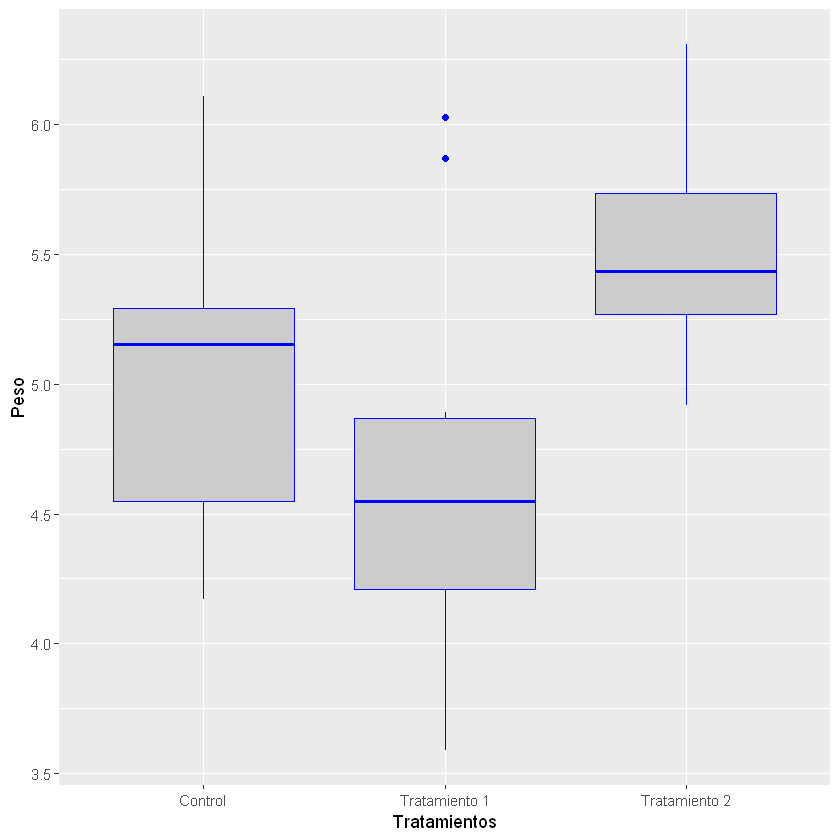

In [35]:
#Visualización de datos
library(ggplot2)

ggplot(PesoPlantas, aes(x = group, y = weight)) +
  geom_boxplot(fill = "grey80", colour = "blue") +
  scale_x_discrete() + xlab("Tratamientos") +
  ylab("Peso")

In [43]:
#ANOVA General
ANOVA<-aov(weight~group, data=PesoPlantas)
summary(ANOVA)

            Df Sum Sq Mean Sq F value Pr(>F)  
group        2  3.766  1.8832   4.846 0.0159 *
Residuals   27 10.492  0.3886                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [25]:
#Tratamiento 1 vs Control
PesoPlantas1<-PesoPlantas[PesoPlantas$group!="Tratamiento 2",]
ANOVA1<-aov(weight~group, data=PesoPlantas1)
summary(ANOVA1)
PesoPlantas1

            Df Sum Sq Mean Sq F value Pr(>F)
group        1  0.688  0.6882   1.419  0.249
Residuals   18  8.729  0.4850               

,weight,group
,<dbl>,<fct>
1,4.17,Control
2,5.58,Control
3,5.18,Control
4,6.11,Control
5,4.50,Control
6,4.61,Control
7,5.17,Control
8,4.53,Control
9,5.33,Control


In [26]:
#Tratamiento 2 vs Control
PesoPlantas2<-PesoPlantas[PesoPlantas$group!="Tratamiento 1",]
ANOVA2<-aov(weight~group, data=PesoPlantas2)
summary(ANOVA2)
PesoPlantas2

            Df Sum Sq Mean Sq F value Pr(>F)  
group        1  1.220  1.2202   4.554 0.0469 *
Residuals   18  4.823  0.2679                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

,weight,group
,<dbl>,<fct>
1,4.17,Control
2,5.58,Control
3,5.18,Control
4,6.11,Control
5,4.50,Control
6,4.61,Control
7,5.17,Control
8,4.53,Control
9,5.33,Control


In [27]:
#Tratamiento 1 vs Tratamiento 2
PesoPlantas3<-PesoPlantas[PesoPlantas$group!="Control",]
ANOVA3<-aov(weight~group, data=PesoPlantas3)
summary(ANOVA3)
PesoPlantas3

            Df Sum Sq Mean Sq F value  Pr(>F)   
group        1  3.741   3.741   9.061 0.00752 **
Residuals   18  7.432   0.413                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

,weight,group
,<dbl>,<fct>
11,4.81,Tratamiento 1
12,4.17,Tratamiento 1
13,4.41,Tratamiento 1
14,3.59,Tratamiento 1
15,5.87,Tratamiento 1
16,3.83,Tratamiento 1
17,6.03,Tratamiento 1
18,4.89,Tratamiento 1
19,4.32,Tratamiento 1


In [42]:
#Discusión Outliers
PesoPlantas1.0<-PesoPlantas[PesoPlantas$group!="Tratamiento 2",]
PesoPlantas1.1<-PesoPlantas1.0[PesoPlantas1.0$weight!=6.03,]
PesoPlantas1.1.1<-PesoPlantas1.1[PesoPlantas1.1$weight!=5.87,]
ANOVA1.1<-aov(weight~group, data=PesoPlantas1.1.1)
summary(ANOVA1.1)
PesoPlantas1.1.1

            Df Sum Sq Mean Sq F value Pr(>F)  
group        1  2.136  2.1360    7.49 0.0146 *
Residuals   16  4.563  0.2852                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

,weight,group
,<dbl>,<fct>
1,4.17,Control
2,5.58,Control
3,5.18,Control
4,6.11,Control
5,4.50,Control
6,4.61,Control
7,5.17,Control
8,4.53,Control
9,5.33,Control


     weight                group  
 Min.   :3.590   Control      :0  
 1st Qu.:4.085   Tratamiento 1:8  
 Median :4.365   Tratamiento 2:0  
 Mean   :4.339                    
 3rd Qu.:4.720                    
 Max.   :4.890                    

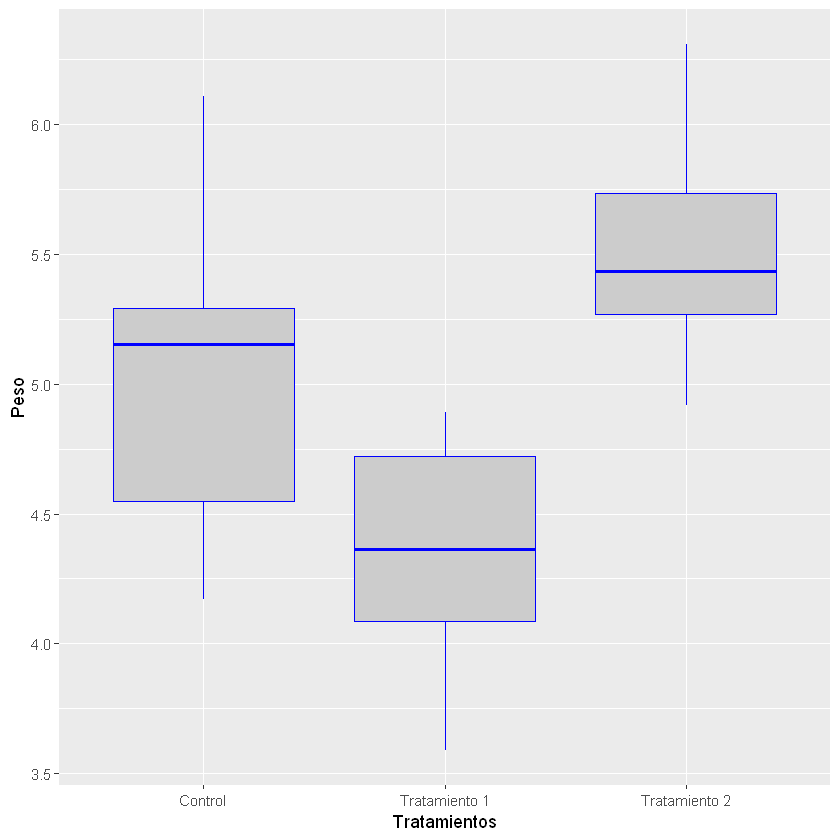

In [40]:
#Discusión Outliers del tratamiento1
outliers<-PesoPlantas[PesoPlantas$weight!=6.03,]
Nooutliers<-outliers[outliers$weight!=5.87,]
Nooutliers1<-Nooutliers[Nooutliers$group=="Tratamiento 1",]
summary(Nooutliers1)

ggplot(Nooutliers, aes(x = group, y = weight)) +
  geom_boxplot(fill = "grey80", colour = "blue") +
  scale_x_discrete() + xlab("Tratamientos") +
  ylab("Peso")

# Comprobación y visualización de los datos

El dataset “PlantGrowth” está compuesto de 30 datos del peso seco de plantas y del tipo de tratamiento que se les a dado. La idea detrás de esto es que puedas comparar el tratamiento utilizado para ver si hay diferencias.

Hay 10 valores en los cuales no se a aplicado ningún tratamiento (Control), 10 valores a los cuales se les ha aplicado el tratamiento 1 y 10 valores que se les ha aplicado el tratamiento 2.

Si nos fijamos en la media total no podemos obtener nada en claro, ya que esta calculando esa media con los valores de los dos tratamientos y el control. Ahora bien, si separamos los datos en tipos de tratamientos, ya podemos sacar más conclusiones. Primeramente, podemos observar que la media del tratamiento 2 es la mayor y es ligeramente más grande que el control, eso si la diferencia entre los dos tratamientos al representar los datos en boxplot se hace muy notoria. Se puede decir visualmente que hay diferencia entre los dos tratamientos y que el tratamiento 2 da mejores resultados que el 1. Cabe destacar, que en el caso de los datos con el tratamiento 1 hay dos valores (weight=6.03 y 5.87) que podríamos clasificarlos como “outliers” ya que se alejan mucho de la media y en el boxplot se ve claramente. Al tener tan pocos valores estos “outliers” modifican mucho el valor de la media del tratamiento 1. Hay que discutir si podemos eliminar o no estos valores, estaría bien conocer más el ámbito de como se han tomado estos datos para saber si ha podido haber error o no.


# Discusión ANOVA

Primeramente, hemos realizado el test ANOVA general comparando todos los tratamientos juntos, con resultados bastante significativos, es decir que se puede decir con bastante certeza que los tratamientos son diferentes entre sí. Exactamente se puede decir con una probabilidad de 98.4% de que los tratamientos son diferentes (fijándonos en el p valor). 

Seguidamente para sacar conclusiones más precisas, he visto conveniente realizar el test ANOVA comparando todos los campos posibles (Control vs Tratamiento 1 y 2 y, finalmente, Tratamiento 1 vs Tratamiento 2).

Podemos observar como el test ANOVA del control respecto al Tratamiento 1 no difieren mucho el uno del otro, es decir no podemos asegurar con total certeza de que el tratamiento 1 es diferente que el Control. Se obtiene un F-value pequeño y el p valor es poco significativo te asegura con un 75% que son diferentes el control del Tratamiento 1 (la probabilidad de equivocarse al asegurar que son diferentes es muy alta). “Se podría decir con una certeza del 75% de que el Tratamiento 1 es peor que no aplicar ningún tratamiento (Control)”.

Al realizar el test ANOVA del control respecto al Tratamiento 2 obtenemos valores bastante significativos. Podríamos asegurar con bastante certeza de que son diferentes el control del Tratamiento 2. “Podemos decir con un 95% de certeza de que el Tratamiento 2 mejora el peso de las plantas”.

Finalmente, si comparamos los dos tratamientos teniendo en cuenta de que el Tratamiento 1 es diferente que el Control, obtenemos al realizar el test ANOVA valores muy significativos de que son tratamientos diferentes y de que el tratamiento 2, por lo tanto, es mejor. Observamos el p valor muy significativo (Probabilidad de que sean iguales de menos del 1%) y un F-valor muy elevado. "Se podría decir con un 99.2% de que el Tratamiento 2 es mejor qu el Tratamiento 1"

Para estar más seguro de que el tratamiento 1 es diferente al control podemos comprobar que al eliminar los “outliers” el test ANOVA de Control respecto al Tratamiento 1 es mucho más significativo. Exactamente puedes asegurar de que el Tratamiento 1 es peor que no realizar ningún tratamiento con una certeza del 98.5%. Y puedes concluir que si se decide eliminar los “outliers” los resultados del test ANOVA serán más significativos porque alejarán la media del Tratamiento 1 del Control y el Tratamiento 2.

Personalmente al no conocer bajo que condiciones se han obtenido estos datos no puedo decidir si es mejor eliminarlos o no los “outliers”. Por suerte, si no los eliminas se puede asegurar con bastante certeza de que los dos tratamientos son diferentes y difieren mucho el uno del otro. Y en este caso, se recomendaría utilizar el tratamiento 2 para las plantas si lo que quieres es mejorar su crecimiento, claro está. 
